Skript zum Testen ohne Generator

PSNR: -25.24 dB
SSIM: 0.3096


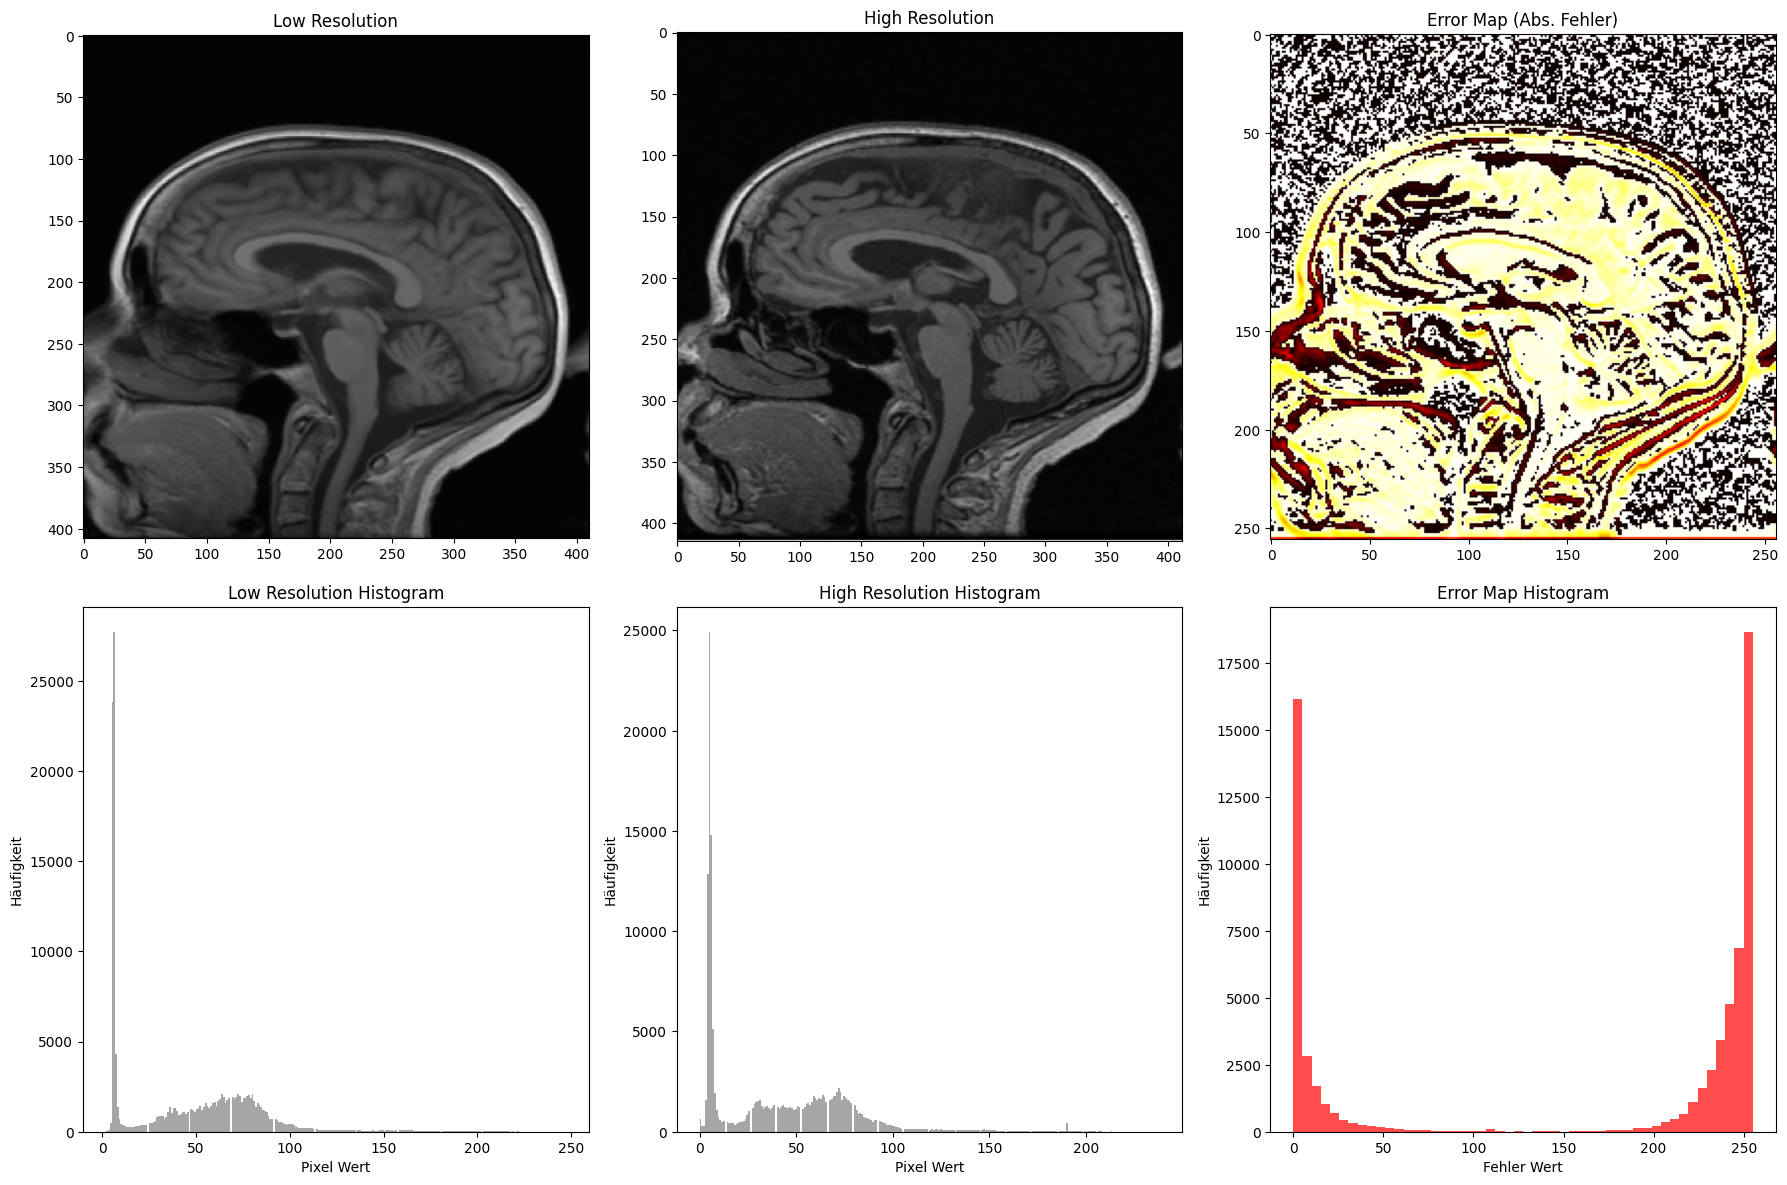

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from PIL import Image
#from torchvision import transforms

lr_img = Image.open("lr_test.png").convert("L")
hr_img = Image.open("hr_test.png").convert("L")

target_size = (256,256)
lr_img_resized = lr_img.resize(target_size, Image.Resampling.LANCZOS)  # LANCZOS für bessere Qualität
hr_img_resized = hr_img.resize(target_size, Image.Resampling.LANCZOS)

# Bilder als NumPy-Arrays konvertieren
lr_np = np.array(lr_img_resized)  # Array-Form: (H, W)
hr_np = np.array(hr_img_resized)  # Array-Form: (H, W)


'''
# 2. Bilder transformieren (in Tensoren umwandeln für die Berechnung)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Bildgröße anpassen
    transforms.Grayscale(num_output_channels=1),  # Nur 1 Kanal für Graustufen
    transforms.ToTensor()  # In Tensor umwandeln
])

lr_tensor = transform(lr_img).unsqueeze(0)  # Shape: (1, 1, H, W)
hr_tensor = transform(hr_img).unsqueeze(0)

# 3. Tensoren in NumPy Arrays umwandeln
lr_np = lr_tensor.squeeze().permute(1, 2, 0).numpy()  # Shape: (H, W)
hr_np = hr_tensor.squeeze().permute(1, 2, 0).numpy()
'''

psnr_value = psnr(hr_np, lr_np, data_range=1.0)
ssim_value = ssim(hr_np, lr_np, multichannel=False, data_range=1.0)

print(f"PSNR: {psnr_value:.2f} dB")
print(f"SSIM: {ssim_value:.4f}")

error_map = np.abs(hr_np - lr_np)

def plot_histogram(image, title):
    # Bild in Grauwert umwandeln
    grayscale_img = image.convert("L")
    img_array = np.array(grayscale_img).flatten()  # Bild in 1D Array umwandeln
    plt.hist(img_array, bins=256, color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Wert')
    plt.ylabel('Häufigkeit')

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(lr_img, cmap='gray')
plt.title("Low Resolution")

plt.subplot(2, 3, 2)
plt.imshow(hr_img, cmap='gray')
plt.title("High Resolution")

plt.subplot(2, 3, 3)
plt.imshow(error_map, cmap='hot')
plt.title("Error Map (Abs. Fehler)")

plt.subplot(2, 3, 4)
plot_histogram(lr_img, "Low Resolution Histogram")

plt.subplot(2, 3, 5)
plot_histogram(hr_img, "High Resolution Histogram")

plt.subplot(2, 3, 6)
plt.hist(error_map.flatten(), bins=50, color='red', alpha=0.7)
plt.title("Error Map Histogram")
plt.xlabel('Fehler Wert')
plt.ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

